<a href="https://colab.research.google.com/github/Youssef-Alyy/machine-learning-labs/blob/main/Deep_Learning/CNN/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Overview

A Convolutional Neural Network (CNN) is a specialized type of neural network designed primarily for processing grid-like data, such as images or audio spectrograms. CNNs have become the cornerstone of many state-of-the-art solutions in computer vision tasks due to their ability to automatically learn spatial hierarchies of features from raw data. Here's an overview of CNNs:

1. **Convolutional Layers**:
   - Convolutional layers are the building blocks of CNNs. They consist of filters (also known as kernels) that slide over the input data and perform convolution operations.
   - Each filter detects specific patterns or features in the input data, such as edges, textures, or more complex structures.
   - Convolutional layers automatically learn these filters during training, optimizing them to extract the most relevant features for the task at hand.

2. **Pooling Layers**:
   - Pooling layers follow convolutional layers and help reduce the spatial dimensions of the feature maps while retaining important information.
   - Common pooling operations include max pooling and average pooling, which downsample the feature maps by taking the maximum or average value within each pooling region.
   - Pooling layers help make the network more robust to small spatial translations and variations in the input data.

3. **Activation Functions**:
   - Activation functions like ReLU (Rectified Linear Unit) are typically applied after convolutional and pooling operations to introduce non-linearity into the network.
   - ReLU activation function replaces negative values with zero, helping the network learn faster and preventing the vanishing gradient problem.

4. **Fully Connected Layers**:
   - Fully connected layers are typically placed at the end of the CNN architecture to perform high-level reasoning and decision-making.
   - These layers take the flattened output of the preceding layers and map it to the output classes or predictions.
   - They may be followed by activation functions appropriate for the task, such as softmax for classification or linear activation for regression.

5. **Training**:
   - CNNs are trained using optimization algorithms like stochastic gradient descent (SGD), Adam, or RMSprop, along with backpropagation.
   - During training, the network learns to minimize a loss function by adjusting its weights and biases based on the error between predicted and actual outputs.
   - Large datasets, such as ImageNet, are often used to train CNNs, sometimes leveraging techniques like transfer learning to apply pre-trained models to similar tasks.

6. **Applications**:
   - CNNs are widely used in various computer vision tasks, including image classification, object detection, image segmentation, facial recognition, and medical image analysis.
   - They have also found applications in other domains, such as natural language processing (e.g., text classification using 1D convolutions) and audio signal processing.

Overall, CNNs have revolutionized the field of computer vision by enabling machines to automatically learn hierarchical representations of visual data, leading to significant advancements in various real-world applications.

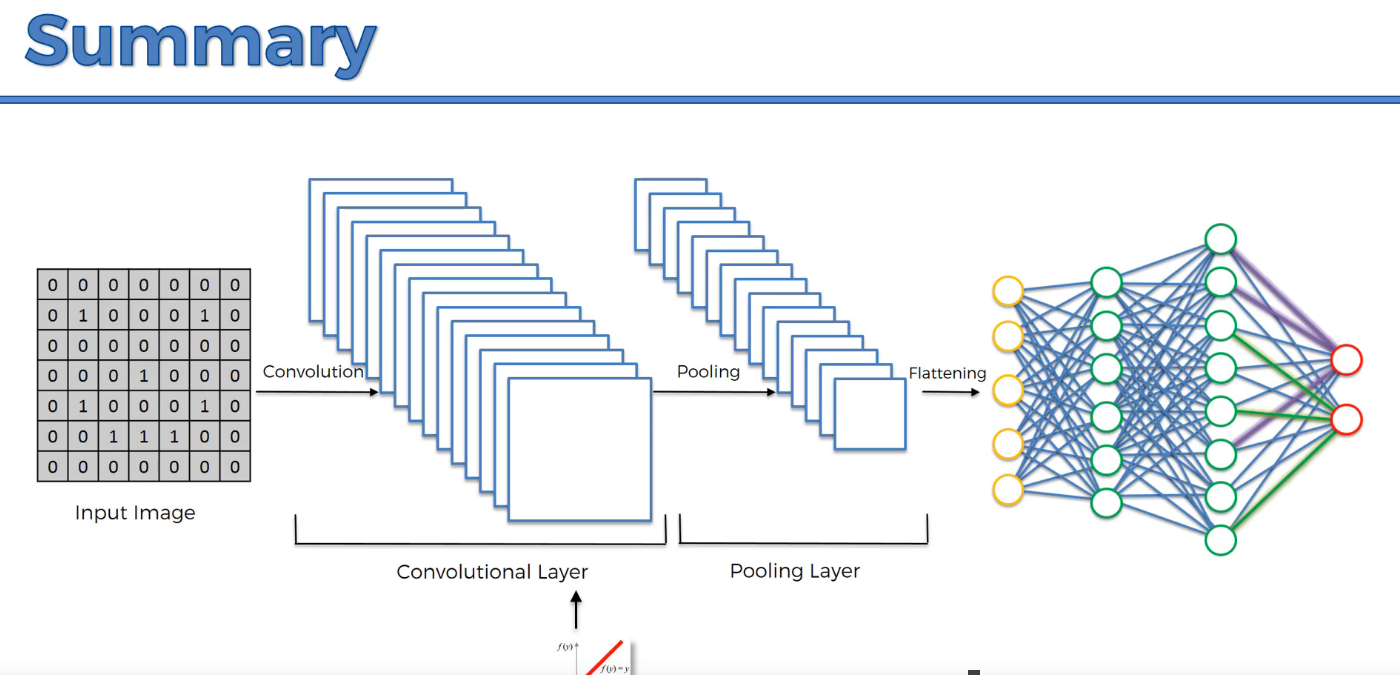

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

It is crucial to apply transformations to the **training set only** to avoid overfitting. If we do not apply these transformations, when training our CNN on the training set, we will get huge differences between the accuracy on the training set vs the test set (High Accuracies for training set and low accuracies in test set). Applying  these transformations is called *Image Augmentation*.

In [ ]:
train_datagen = ImageDataGenerator(
              rescale=1./255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)
train_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64), ## makes training faster default was 150
        batch_size=32, ## classic value
        class_mode='binary') ## binary vs categorical

### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

This is the classic arch that specifies the number of filters as 32 for the first 2 layers. Other arch are available with possible better results.

In [ ]:
## layers.Conv2D(#filters, kernel/filter = (3, 3), activation='relu',input_shape = (size,size,1 or 3)
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3])) # 3 for colored and 1 for b & w

### Step 2 - Pooling

In [ ]:
## we will apply max pooling here model.add(layers.MaxPooling2D((2, 2)))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides = 2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2,strides = 2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = train_set, validation_data = test_set, epochs = 25) ##epochs take time, increase till acc starts converging

In [ ]:
##confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = cnn.predict(test_set)
if y_pred[0][0] == 0:
  print("This is a Cat!")
else:
  print("This is a Dog!")

## Part 4 - Making a single prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size=(64,64))

## convert PIL IMG format to an array
test_image = image.img_to_array(test_image)  # this is a Numpy array with shape (3, 64, 64)
## add batch dimension as model was trained with batches
test_image = np.expand_dims(test_image, axis = 0)

result = cnn.predict(test_image)
train_set.class_indices
if result[0][0] == 0:
  print("This is a Cat!")
else:
  print("This is a Dog!")